# Report of k-means project.
#### MSDS 689 -- Data Structure
#### Qingyi Sun
*Feb 10, 2020* 


## • Background

This notebook is the report of my implementation of k-means algorithm. All the algorithms are implemented in the file `kmeans.py`. Here is to show the results when using the algorithms to cluster several different datasets.

## • Algorithms
### 1. Standard kmeans algorithm:  
I implement this as the base case. The data points are clustered together on the basis of some kind of similarity.

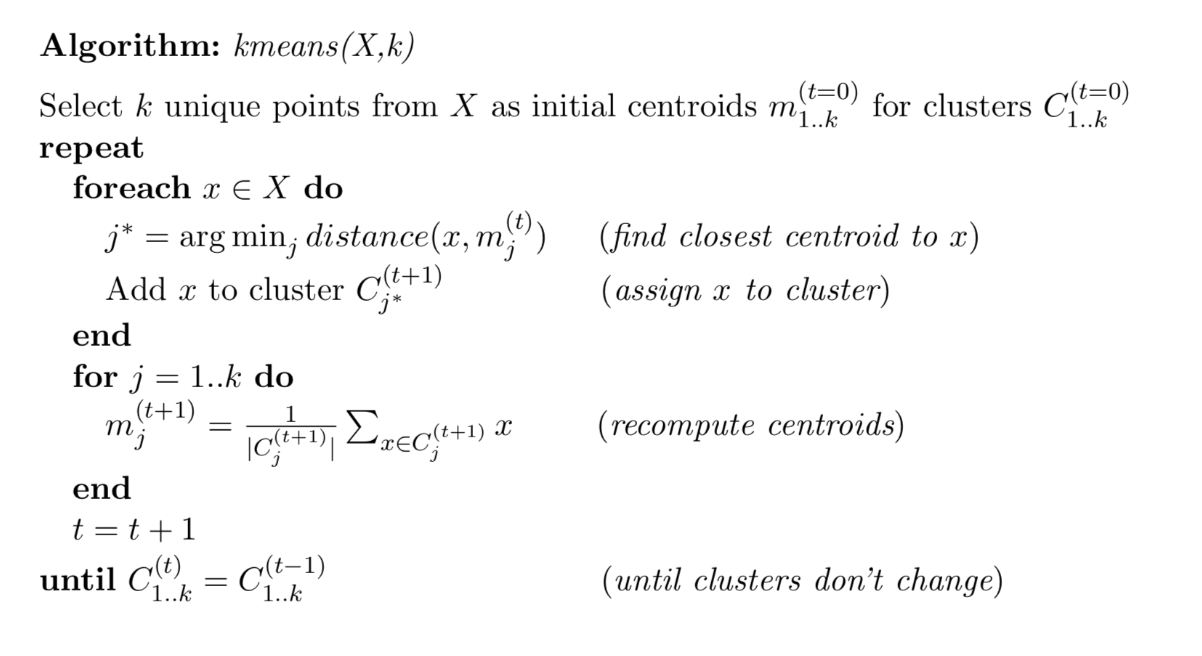
### 2. kmeans++:  
* Basically, `kmeans++` is the same thing with the standard kmeans. However, when we are trying to pass multi-dimension data into our kmeans model, we need something to handle the dimensions.   
* The key point here is to keep the `centroids` the same shape as our input data `X`. 

### 3. With images:  

Here, we want to extend to image compression with kmeans clustering. K-means will group different colors into k clusters
We have several key points here.  
* Images are also matrices. For grey scale image, it will be 2D matrix `(shape: m*n)`. For RGB image, it will be 3D matrix `(shape: m*n*3)`. Before passing the data into the model, we need to reshape the data to `(m*n, 1)`, for RGB images, we need to seperate the three channels and then reshape them.  
* To rescale the color matrix, we need two functions `reassign_grey` and `reassign_color`. They will assign one value of the centroids to every pixel.

In [27]:
import sklearn
from sklearn.cluster import SpectralClustering
import numpy as np
from numpy.linalg import norm
from PIL import Image
from IPython.display import display
import time

In [28]:
from sklearn.datasets import load_breast_cancer

*Run file `kmeans.py`, all algorithms.*

In [29]:
%run kmeans

## • Results: 
### 1. Basic case: 1-dimension input X

In [34]:
s = time.time()
grades = [92.65, 93.87, 74.06, 86.94, 92.26, 94.46, 92.94, 80.65, 92.86, 
          85.94, 91.79, 95.23, 85.37, 87.85, 87.71, 93.03]
k = 3
grades = np.array(grades).reshape(-1,1)
centroids, clusters = kmeans(grades, k)
print('centroids:', centroids)
print('clusters:', clusters)
for j in range(k):
    print("vector assignments:", grades[clusters[j]].reshape(1,-1))
print('\nTakes {} seconds.'.format(time.time()-s))

centroids: [[92.58833333]
 [84.07428571]
 [94.52      ]]
clusters: [[0, 4, 6, 8, 10, 15], [2, 3, 7, 9, 12, 13, 14], [1, 5, 11]]
vector assignments: [[92.65 92.26 92.94 92.86 91.79 93.03]]
vector assignments: [[74.06 86.94 80.65 85.94 85.37 87.85 87.71]]
vector assignments: [[93.87 94.46 95.23]]

Takes 0.0029778480529785156 seconds.


### 2. 2D input, breast cancer data set.

In [33]:
s = time.time()
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
k = 2
centroids, clusters = kmeans(X, k=2, centroids='kmeans++', tolerance=.01)
likely_confusion_matrix(y, clusters)
print('\nTakes {} seconds.'.format(time.time()-s))

        pred F  pred T
Truth
F          130      82
T            1     356
clustering accuracy:  0.8541300527240774

Takes 0.01389002799987793 seconds.


### 3. 2D input, grey scale image(rescale grey)  
The following is the original image.  
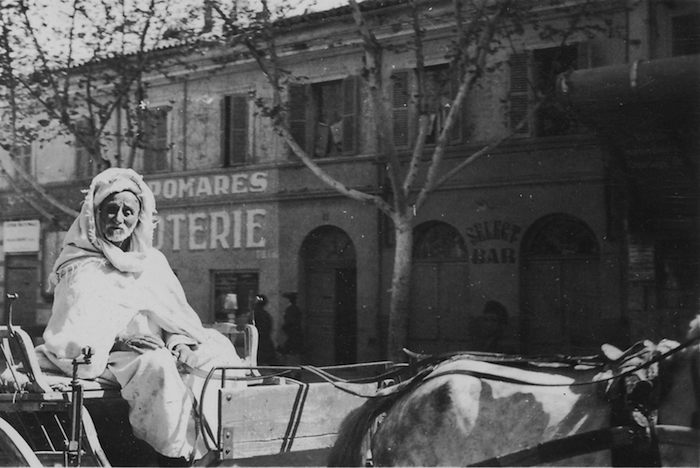

We keep only 4 grey scales in the image, after rescaling, we got this:  
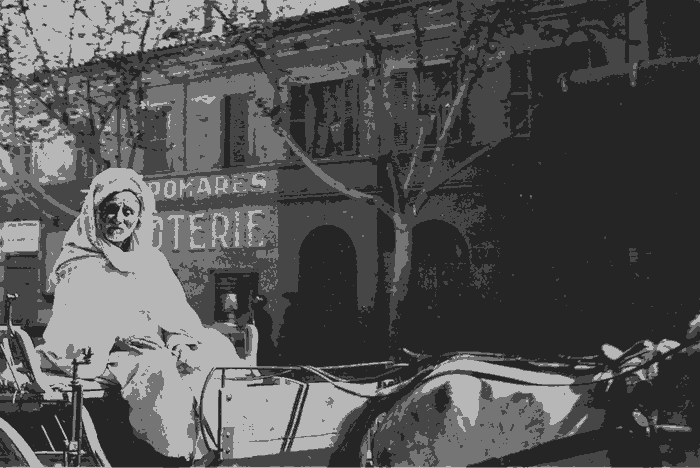  
And the whole process takes 0.6 seconds.

In [35]:
s = time.time()
img = Image.open('north-africa-1940s-grey.png')
X = np.array(img)
X_ = X.reshape(-1,1)
row, col = X.shape
k = 4
centroids, clusters = kmeans(X_, k=k, centroids='kmeans++', tolerance=.01)
centroids = centroids.astype(np.uint8)
X = reassign_grey(X, centroids, clusters)
img_ = Image.fromarray(X.reshape(row, col), 'L') # L means grayscale
print('Takes {} seconds.'.format(time.time()-s))

Takes 0.5526509284973145 seconds.


### 4. 3D input, RGB image(rescale to 32 colors)  
The following is the original image.
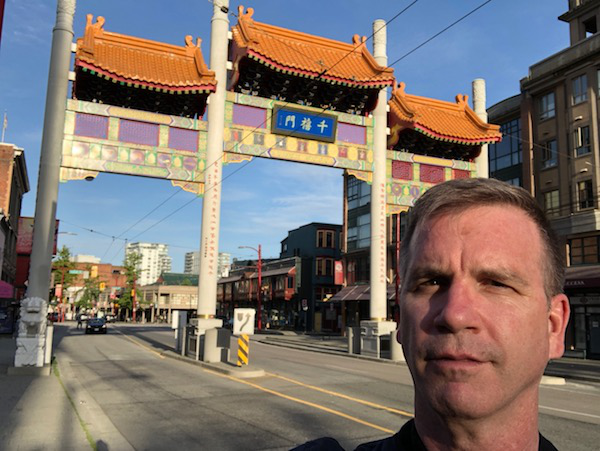

We keep only 32 different colors in the image, after rescaling, we got this:
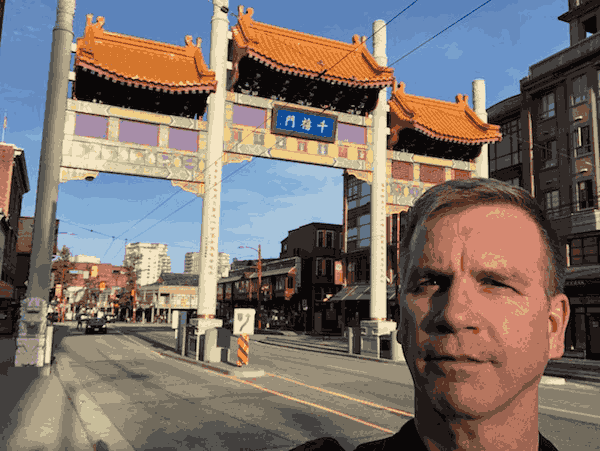  
This whole process takes about 50 seconds. As we can see, the model does a really good job, it efficiently compressed the image and kept enough information.

In [36]:
s = time.time()
img2 = Image.open('parrt-vancouver.jpg')
RGB_X = np.array(img2)
RGB_X_ = np.array([RGB_X[:,:,i].flatten() for i in range(RGB_X.shape[2])]).T
k=32
centroids, clusters = kmeans(RGB_X_, k=k, centroids='kmeans++', tolerance=.01)
centroids = centroids.astype(np.uint8)
RGB_X = reassign_colors(RGB_X, centroids, clusters)
img2_ = Image.fromarray(RGB_X)
print(time.time()-s)

49.72240209579468


### 5. 3D input, RGB image(rescale to 32 colors)   
This task is pretty close to the above one but this image seems to have less original colors (actually, 52860 colors, the former one has 102376). The original image is as below.  
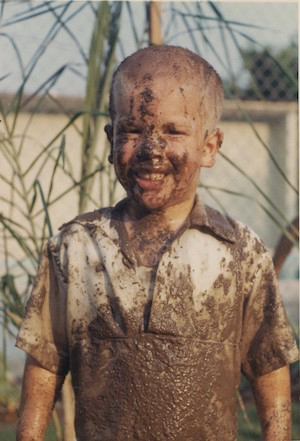

We keep only 32 different colors in the image, after rescaling, we got this:  
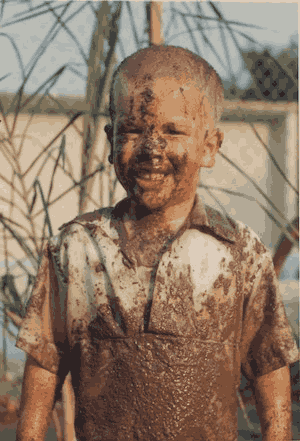  
This takes 26 seconds.

We keep only 16 different colors in the image, after rescaling, we got this:  
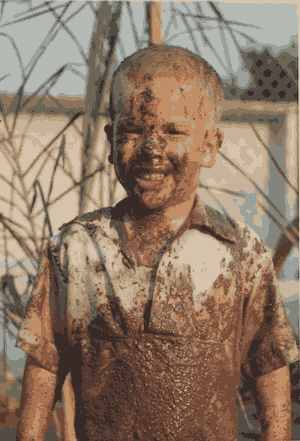
This only takes about 6 seconds.

In [37]:
s = time.time()
img3 = Image.open('parrt.jpg')
RGB_X3 = np.array(img3)
RGB_X3_ = np.array([RGB_X3[:,:,i].flatten() for i in range(RGB_X3.shape[2])]).T
k=32
centroids, clusters = kmeans(RGB_X3_, k=k, centroids='kmeans++', tolerance=.01)
centroids = centroids.astype(np.uint8)
RGB_X3 = reassign_colors(RGB_X3, centroids, clusters)
img3_ = Image.fromarray(RGB_X3)
print(time.time()-s)

25.52714490890503


In [64]:
s = time.time()
img3 = Image.open('parrt.jpg')
RGB_X3 = np.array(img3)
RGB_X3_ = np.array([RGB_X3[:,:,i].flatten() for i in range(RGB_X3.shape[2])]).T
k=16
centroids, clusters = kmeans(RGB_X3_, k=k, centroids='kmeans++', tolerance=.01)
centroids = centroids.astype(np.uint8)
RGB_X3 = reassign_colors(RGB_X3, centroids, clusters)
img3_ = Image.fromarray(RGB_X3)
print(time.time()-s)

6.308692932128906


K-means can efficiently compress the input data, this will reduce the memory space to store the data(image).  
As we can see here, the compression could make the image get vanished (which means loss of details and information). We can use a relatively larger k value (keep more clusters), meanwhile we want to minimize the k.